In [1]:
# https:/onepagecode.substack.com
!pip install scikit-learn xgboost
!pip install yfinance
!pip install finta

     |████████████████████████████████| 6.4 MB 9.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


This code prepares your computer for stock prediction using XGBoost, a machine learning algorithm. It installs the necessary libraries, such as scikit-learn, xgboost, yfinance, and finta. These libraries provide the tools and functions needed to work with stock data and build predictive models.

By using XGBoost, you can train a model to predict future stock prices based on historical stock data. This code downloads and installs the required libraries so you can proceed with loading data, preprocessing it, and training the prediction model.

In [2]:
# https:/onepagecode.substack.com

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finta import TA
import yfinance as yf
plt.style.use(style='seaborn')
%matplotlib inline


It imports the necessary libraries, including pandas, numpy, matplotlib, finta, and yfinance. These libraries provide the tools and functions needed to work with stock data, perform mathematical computations, plot graphs, and access stock market data. The code then sets the plotting style to "seaborn" and ensures that the graphs are displayed inline.

To perform the stock prediction, the code uses technical analysis indicators provided by the "finta" library. These indicators are applied to historical stock market data obtained from the Yahoo Finance API using the "yfinance" library.

In [3]:
# https:/onepagecode.substack.com
stock = ['MSFT']
df = yf.download(stock, '2017-01-01', '2021-12-20')
df


[*********************100%***********************]  1 of 1 completed


Open        High  ...   Adj Close    Volume
Date                                ...                      
2017-01-03   62.790001   62.840000  ...   58.185520  20694100
2017-01-04   62.480000   62.750000  ...   57.925175  21340000
2017-01-05   62.189999   62.660000  ...   57.925175  24876000
2017-01-06   62.299999   63.150002  ...   58.427258  19922900
2017-01-09   62.759998   63.080002  ...   58.241310  20382700
...                ...         ...  ...         ...       ...
2021-12-13  340.679993  343.790009  ...  339.399994  28899400
2021-12-14  333.220001  334.640015  ...  328.339996  44438700
2021-12-15  328.609985  335.190002  ...  334.649994  35381100
2021-12-16  335.709991  336.760010  ...  324.899994  35034800
2021-12-17  320.880005  324.920013  ...  323.799988  47750300

[1250 rows x 6 columns]

This code downloads the historical stock prices for Microsoft (MSFT) from January 1, 2017, to December 20, 2021, using the Yahoo Finance API. The downloaded data is stored in a table, which can then be used to predict stock prices using the XGBoost algorithm.

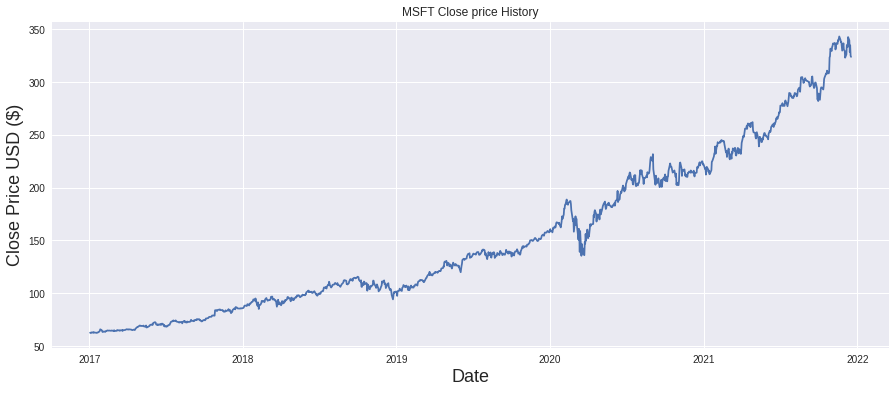

In [4]:
# https:/onepagecode.substack.com
plt.figure(figsize=(15,6))
plt.title('MSFT Close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

This code plots the historical closing price of a stock over time. It imports the necessary libraries and sets the plot size. Then, it sets the title of the plot and plots the closing price data from a DataFrame. The x-axis shows the dates and the y-axis shows the closing price in USD. Finally, it displays the plot.

In [5]:
# https:/onepagecode.substack.com
df.describe()

Open         High  ...    Adj Close        Volume
count  1250.000000  1250.000000  ...  1250.000000  1.250000e+03
mean    153.246024   154.677496  ...   150.263262  2.852467e+07
std      74.407882    75.101537  ...    75.656363  1.273203e+07
min      62.189999    62.660000  ...    57.925175  7.425600e+06
25%      94.004999    95.109999  ...    89.569649  2.033012e+07
50%     134.725006   135.709999  ...   131.156250  2.517795e+07
75%     211.572498   214.207500  ...   208.973961  3.274125e+07
max     344.619995   349.670013  ...   343.109985  1.112421e+08

[8 rows x 6 columns]

This code calculates and displays a summary of the data in the df DataFrame. It does this by using the describe() function, which generates various statistical measures for each column in the DataFrame, such as the number of values, the average, the standard deviation, the minimum and maximum values, and the quartiles. The result is a table that provides an overview of the data's distribution and central tendencies.

In [6]:
# https:/onepagecode.substack.com
df['SMA200'] = TA.SMA(df, 200)
df['RSI'] = TA.RSI(df)
df['ATR'] = TA.ATR(df)
df['BBWidth'] = TA.BBWIDTH(df)
df['Williams'] = TA.WILLIAMS(df)

df = df.iloc[200:, :]

This code calculates several technical indicators that are used to predict stock prices using the XGBoost algorithm. It adds columns to the DataFrame for the following indicators:

Simple Moving Average (SMA) over a period of 200 days
Relative Strength Index (RSI)
Average True Range (ATR)
Bollinger Bands Width (BBWidth)
Williams %R (Williams) indicator
After calculating these indicators, the code removes the first 200 rows from the DataFrame, since these rows do not have enough data for the SMA200 calculation.

In [7]:
# https:/onepagecode.substack.com
df.tail(10)

Open        High         Low  ...       ATR   BBWidth   Williams
Date                                            ...                               
2021-12-06  323.950012  327.450012  319.230011  ...  7.540719  0.063635 -74.209861
2021-12-07  331.640015  335.799988  330.100006  ...  7.858575  0.063322 -46.618183
2021-12-08  335.309998  335.500000  330.799988  ...  7.895004  0.063223 -46.460194
2021-12-09  334.410004  336.489990  332.119995  ...  7.826431  0.062483 -52.370416
2021-12-10  334.980011  343.000000  334.790009  ...  8.260001  0.065491 -22.534771
2021-12-13  340.679993  343.790009  339.079987  ...  7.873572  0.066340 -17.041976
2021-12-14  333.220001  334.640015  324.109985  ...  8.517859  0.068868 -59.976733
2021-12-15  328.609985  335.190002  324.500000  ...  8.977859  0.067670 -35.481410
2021-12-16  335.709991  336.760010  323.019989  ...  9.258575  0.071303 -73.330774
2021-12-17  320.880005  324.920013  317.250000  ...  9.138576  0.073218 -75.320325

[10 rows x 11 columns]

The line df.tail(10) displays the last 10 rows of the df DataFrame. This helps us to see the most recent data in the dataset and to identify the latest trends and patterns in the stock market. This code is primarily used for data analysis and visualization before applying the XGBoost algorithm to make accurate stock predictions.

In [8]:
# https:/onepagecode.substack.com
df['target'] = df.Close.shift(-1)
df.dropna(inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Open       High        Low  ...   BBWidth   Williams     target
Date                                         ...                                
2017-10-18  77.669998  77.849998  77.370003  ...  0.081428  -6.250046  77.910004
2017-10-19  77.570000  77.930000  77.349998  ...  0.084517  -0.473854  78.809998
2017-10-20  78.320000  78.970001  78.220001  ...  0.090518  -3.041893  78.830002
2017-10-23  78.989998  79.339996  78.760002  ...  0.090489  -9.058521  78.860001
2017-10-24  78.900002  79.199997  78.459999  ...  0.088069 -10.958813  78.629997

[5 rows x 12 columns]

This code adds a new column called target to a DataFrame called df, which contains the closing prices of a stock. The target column is created by shifting the Close column one row up. This means that the target column contains the closing prices for the next day. The code then removes any rows with missing values using the dropna() function. Finally, it displays the first few rows of the modified DataFrame.

In [9]:
# https:/onepagecode.substack.com
def train_test_split(data, perc):
  data = data.values
  n = int(len(data) *(1 - perc))
  return data[:n], data[n:]

This code defines a function called train_test_split that splits a dataset into training and testing sets. It takes two inputs:

data: The dataset to be split.
perc: The percentage of data to be used for testing.
The function first converts the input dataset into an array. Then, it calculates the number of rows to be used for training by multiplying the length of the data array with (1 - perc) and converting the result to an integer. Finally, the function returns two arrays: the first array contains the rows of data up to the calculated training index, and the second array contains the remaining rows of data for testing purposes.

In [10]:
# https:/onepagecode.substack.com
train, test = train_test_split(df, 0.2)
train

array([[ 7.76699982e+01,  7.78499985e+01,  7.73700027e+01, ...,
         8.14284643e-02, -6.25004585e+00,  7.79100037e+01],
       [ 7.75699997e+01,  7.79300003e+01,  7.73499985e+01, ...,
         8.45172331e-02, -4.73853964e-01,  7.88099976e+01],
       [ 7.83199997e+01,  7.89700012e+01,  7.82200012e+01, ...,
         9.05176355e-02, -3.04189348e+00,  7.88300018e+01],
       ...,
       [ 2.45029999e+02,  2.46130005e+02,  2.42919998e+02, ...,
         1.42128727e-01, -1.51970425e+01,  2.44199997e+02],
       [ 2.41320007e+02,  2.44309998e+02,  2.40940002e+02, ...,
         1.20182114e-01, -1.30582415e+01,  2.43789993e+02],
       [ 2.41800003e+02,  2.43929993e+02,  2.40860001e+02, ...,
         1.09380455e-01, -1.58322855e+01,  2.40970001e+02]])

To train our model, we need to split our dataset into two parts: a training set and a testing set. The training set is the data that we will use to teach our model how to make predictions, and the testing set is the data that we will use to evaluate how well our model is performing.

To split our dataset, we will use a function called train_test_split. This function takes two arguments: the dataset and the test size. The test size is a percentage of the dataset that will be used for testing. In this case, we will use 20% of the dataset for testing, which means that 80% of the dataset will be used for training.

After we have split the dataset, we will have two new variables: train and test. The train variable will contain the training set, and the test variable will contain the testing set.



In [11]:
# https:/onepagecode.substack.com
print(len(df))
print(len(train))
print(len(test))
train[0,:-1]


1049
839
210


array([ 7.76699982e+01,  7.78499985e+01,  7.73700027e+01,  7.76100006e+01,
        7.34026871e+01,  1.33007000e+07,  6.91474504e+01,  7.23980701e+01,
        6.92856380e-01,  8.14284643e-02, -6.25004585e+00])

The first line of code prints the number of rows in the df dataframe. The second line of code prints the number of rows in the train training set. The third line of code prints the number of rows in the test testing set. The last line of code accesses the first row of the train training set and excludes the last column, which is the target variable (the stock price).



In [12]:
# https:/onepagecode.substack.com
X = train[:,:-1]
y = train[:,-1]
y

array([ 77.91000366,  78.80999756,  78.83000183,  78.86000061,
        78.62999725,  78.76000214,  83.80999756,  83.88999939,
        83.18000031,  83.18000031,  84.05000305,  84.13999939,
        84.47000122,  84.26999664,  84.55999756,  84.08999634,
        83.87000275,  83.93000031,  84.05000305,  82.98000336,
        83.19999695,  82.40000153,  82.52999878,  83.72000122,
        83.11000061,  83.26000214,  83.87000275,  84.87999725,
        83.33999634,  84.16999817,  84.26000214,  81.08000183,
        81.58999634,  82.77999878,  82.48999786,  84.16000366,
        85.23000336,  85.58000183,  85.34999847,  84.69000244,
        86.84999847,  86.37999725,  85.83000183,  85.51999664,
        85.5       ,  85.51000214,  85.40000153,  85.70999908,
        85.72000122,  85.54000092,  85.94999695,  86.34999847,
        87.11000061,  88.19000244,  88.27999878,  88.22000122,
        87.81999969,  88.08000183,  89.59999847,  88.34999847,
        90.13999939,  90.09999847,  90.        ,  91.61

The train variable contains a dataset of historical stock prices. To train the model, we need to split the dataset into two parts: features and target variable.

Features are the input variables that we will use to predict the stock price. In this case, the features include all the columns of the dataset except for the last column, which is the target variable.

The target variable is the output variable that we want to predict, which is the stock price.

This code separates the features and target variable from the dataset and assigns them to the variables X and y, respectively. The X variable contains the features, and the y variable contains the target variable.

Once the features and target variable have been separated, we can use the XGBoost algorithm to train a model to predict the stock price.

In [ ]:
# https:/onepagecode.substack.com
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3, 6],
           'learning_rate': [0.05],
           'n_estimators': [700, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = XGBRegressor(seed = 20) 
modl = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
modl.fit(X, y)
print("Best parameters:", modl.best_params_)
print("Lowest RMSE: ", (-modl.best_score_)**(1/2.0))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[06:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:07] WARNING: /workspace/src/objective/regres

 It first imports the necessary libraries and defines a dictionary called params which contains different parameters for the XGBRegressor model. These parameters control how the model is trained, such as the maximum depth of each tree in the model, the step size in each boosting iteration, the number of trees in the model, and the fraction of columns to be randomly sampled for each tree.

Next, the code creates an XGBRegressor object with a specified seed value. This ensures that the model is trained consistently each time it is run.

The code then uses the GridSearchCV function to perform a grid search over a range of parameter values. This means that the GridSearchCV function will train the model multiple times with different combinations of parameter values and select the model with the best performance.

The GridSearchCV function takes the XGBRegressor object as the estimator, the params dictionary as the parameter grid, the mean squared error (MSE) score as the scoring function, and verbose=1 for detailed output.

The code then calls the fit() method on the GridSearchCV object with the training data X and y. This trains the model using the best combination of parameters found during the grid search.

Finally, the code prints the best parameters found by the grid search and the lowest root mean squared error (RMSE) score. The RMSE score is a measure of how well the model predicts the stock prices. A lower RMSE score indicates that the model is making more accurate predictions.

In [13]:
# https:/onepagecode.substack.com

from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=750, colsample_bytree=0.7, learning_rate=0.05, max_depth=3,gamma=1)
model.fit(X,y)


XGBRegressor(colsample_bytree=0.7, gamma=1, learning_rate=0.05,
             n_estimators=750, objective='reg:squarederror')

It sets a few parameters to control how the model is trained and how complex it is, then trains the model on the training data. The model can then be used to predict stock prices for new data.

In [14]:
# https:/onepagecode.substack.com
test[0,:]


array([ 2.43750000e+02,  2.43860001e+02,  2.40179993e+02,  2.40970001e+02,
        2.39517288e+02,  2.52626000e+07,  2.10854350e+02,  5.98064285e+01,
        4.01214273e+00,  9.49892591e-02, -3.76642267e+01,  2.34509995e+02])

This code gets the first row of the stock price dataset. It does this by using the index [0,:]. The first row of the dataset may contain important information, such as the oldest stock price or the most recent stock price.

In [ ]:
# https:/onepagecode.substack.com
val = np.array(test[0, :-1]).reshape(1, -1)
pred = model.predict(val)
pred

array([240.47543], dtype=float32)

This code predicts the stock price for a particular day using XGBoost. It first takes the first row of the test data and removes the last element, which is the target variable (the stock price). It then reshapes the resulting array into a 2D array with one row, which represents the features of the stock data. Finally, it uses the trained model to predict the stock price based on the given features and stores the predicted value in the pred variable.

In [15]:
# https:/onepagecode.substack.com
def xgb_predict(train, val):
  train = np.array(train)
  X, y = train[:, :-1], train[:,-1]
  model = XGBRegressor(objective='reg:squarederror', n_estimators=750, learning_rate=0.05, colsample_bytree=0.7,max_depth=3,gamma=5)
  model.fit(X,y)
  val = np.array(val).reshape(1, -1)
  pred = model.predict(val)
  return pred[0]

The code converts the training and validation datasets into NumPy arrays, which are a type of data structure that is efficient for machine learning algorithms.
The code separates the features from the target variable. The features are the input variables that the model will use to predict the target variable, which is the stock price.
The code creates an XGBRegressor model with the specified parameters. These parameters control how the model is trained and how complex it is.
The code trains the model on the training dataset. This means that the model learns the relationships between the features and the target variable in the training data.
The code predicts the stock prices for the validation dataset.
The code returns the predictions.

In [16]:
# https:/onepagecode.substack.com
xgb_predict(train, test[0, :-1])


240.94344

This code uses the trained XGBoost model to predict the stock price for the first record in the test dataset. It does this by calling the xgb_predict function with the training data and the features of the first record in the test dataset, except for the last column. The last column is the target variable (the stock price), which we are trying to predict.

In [17]:
# https:/onepagecode.substack.com
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  mape = np.mean(np.abs((actual-pred)/actual))*100
  return mape

This code defines a function called mape() that calculates the Mean Absolute Percentage Error (MAPE) for a set of actual and predicted values. It takes the actual and predicted values as input, converts them into NumPy arrays, calculates the percentage difference between each pair of values, and then averages the absolute values of these differences. Finally, it multiplies this average by 100 to get the MAPE.

In [18]:
# https:/onepagecode.substack.com

from sklearn.metrics import mean_squared_error

def validate(data, perc):
  predictions = []
  train, test = train_test_split(data, perc)
  history = [x for x in train]

  for i in range(len(test)):
    X_test, y_test = test[i, :-1], test[i, -1]
    pred = xgb_predict(history, X_test)
    predictions.append(pred)

    history.append(test[i])

  error = mean_squared_error(test[:, -1], predictions, squared=False) 
  MAPE = mape(test[:,-1], predictions)
  return error, MAPE, test[:, -1], predictions



This code uses the XGBoost algorithm to predict stock prices. It imports the sklearn.metrics library to calculate the mean squared error (MSE).

The code defines a function called validate() that takes two arguments: the data and the percentage. Inside the function, the data is split into a training set and a test set. Then, a variable called history is initialized as a list containing the elements from the training set.

A loop is then executed for each element in the test set. For each iteration, the input features (X_test) and the corresponding target value (y_test) are extracted from the test set. The function xgb_predict() is then called to predict the target value using the history data. The predicted value is appended to a list called predictions.

After the loop, the MSE is calculated using the actual target values from the test set and the predicted values. The function mape() is used to calculate the Mean Absolute Percentage Error (MAPE) between the actual and predicted values.

The final output of the function includes the MSE, MAPE, the actual target values from the test set, and the predicted values.

In [19]:
# https:/onepagecode.substack.com

rmse, MAPE, y, pred = validate(df, 0.2)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


This code uses the validate() function to calculate the root mean square error (RMSE), mean absolute percentage error (MAPE), actual values (y), and predicted values (pred) for a given dataframe df. The validate() function splits the dataframe into a training set and a test set with a ratio of 0.2, trains an XGBoost model on the training set, and evaluates the model on the test set.

In [20]:
# https:/onepagecode.substack.com
print("RMSE: " f'{rmse}')
print("MAPE: " f'{MAPE}')
print(y)
print(pred)

RMSE: 4.096993873490079
MAPE: 1.1339287329463676
[234.50999451 233.27000427 234.55000305 228.99000549 232.38000488
 236.94000244 233.86999512 227.55999756 226.72999573 231.6000061
 227.38999939 233.77999878 232.41999817 237.13000488 235.75
 234.80999756 237.71000671 237.03999329 230.72000122 230.3500061
 235.99000549 237.58000183 235.46000671 232.33999634 236.47999573
 235.24000549 231.8500061  235.77000427 242.3500061  249.07000732
 247.86000061 249.8999939  253.25       255.8500061  255.91000366
 258.48999023 255.58999634 259.5        260.73999023 258.73999023
 258.26000977 260.57998657 257.17001343 261.1499939  261.54998779
 261.97000122 254.55999756 252.50999451 252.17999268 251.86000061
 247.78999329 246.47000122 249.72999573 252.46000671 247.17999268
 246.22999573 239.         243.02999878 248.1499939  245.17999268
 243.08000183 243.11999512 246.47999573 245.16999817 250.77999878
 251.72000122 251.49000549 249.30999756 249.67999268 247.3999939
 247.30000305 245.71000671 250.78999

This code prints the values of "RMSE" and "MAPE", which are likely calculated metrics used to evaluate the accuracy of a stock prediction model. It then prints the values of "y" and "pred", which are probably the actual and predicted stock prices respectively.

In [21]:
# https:/onepagecode.substack.com
pred = np.array(pred)
test_pred = np.c_[test,pred]


This code takes the predicted values from a stock prediction model and converts them into a numpy array. Then, it combines these predicted values with the original test dataset using the np.c_ function. This allows us to see the predicted values alongside the corresponding features in the test dataset.

In [22]:
# https:/onepagecode.substack.com
df_TP = pd.DataFrame(test_pred, columns=['Open', 'High','Low','Close','Adj Close','Volume','SMA200','RSI','ATR','BBWidth','Williams','Target','Pred'])

This code creates a pandas DataFrame called `df_TP`. The DataFrame has columns named 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA200', 'RSI', 'ATR', 'BBWidth', 'Williams', 'Target', and 'Pred'. The values for these columns are taken from the `test_pred` array.

Text(0, 0.5, 'Price in USD $')

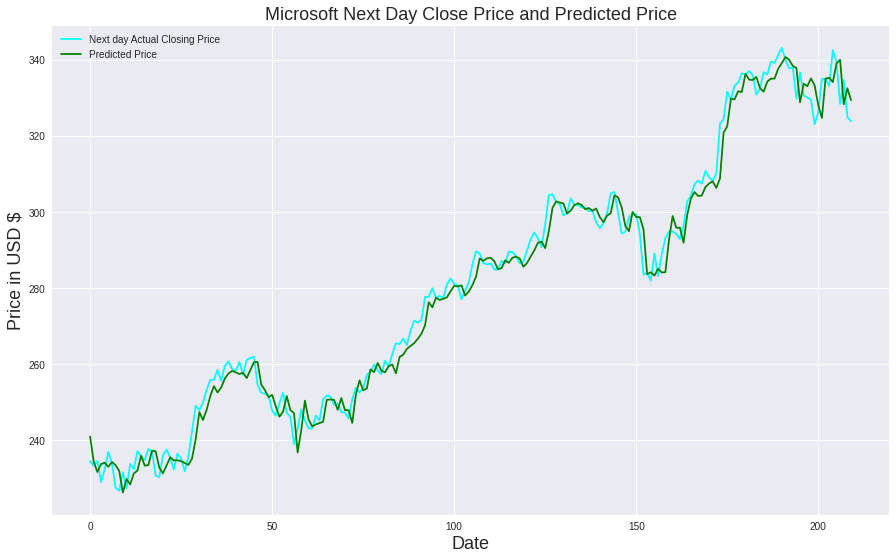

In [27]:
# https:/onepagecode.substack.com
plt.figure(figsize= (15, 9))
plt.title('Microsoft Next Day Close Price and Predicted Price' , fontsize = 18)
plt.plot(df_TP['Target'], label= "Next day Actual Closing Price", color= 'cyan')
plt.plot(df_TP['Pred'], label="Predicted Price", color = 'green', alpha=1)
plt.xlabel('Date', fontsize = 18)
plt.legend(loc = "upper left")
plt.ylabel('Price in USD $', fontsize = 18)




This code is responsible for plotting the next day close price of Microsoft's stock and the predicted price using XGBoost. The plot is displayed with the help of the matplotlib library. The x-axis represents the dates, while the y-axis represents the price of the stock in USD. The cyan line represents the actual closing price for the next day, whereas the green line represents the predicted price. The plot also includes a legend and labels for the x-axis and y-axis to provide a better understanding of the data.

In [28]:
# https:/onepagecode.substack.com
df_TP

Open        High         Low  ...   Williams      Target        Pred
0    243.750000  243.860001  240.179993  ... -37.664227  234.509995  240.943436
1    237.419998  237.929993  232.399994  ... -84.632200  233.270004  234.293182
2    230.330002  234.830002  228.729996  ... -73.908011  234.550003  231.652451
3    230.009995  235.199997  229.000000  ... -66.551700  228.990005  233.741791
4    232.080002  234.589996  227.880005  ... -93.917805  232.380005  234.082321
..          ...         ...         ...  ...        ...         ...         ...
205  334.980011  343.000000  334.790009  ... -22.534771  339.399994  338.962128
206  340.679993  343.790009  339.079987  ... -17.041976  328.339996  339.940369
207  333.220001  334.640015  324.109985  ... -59.976733  334.649994  328.276642
208  328.609985  335.190002  324.500000  ... -35.481410  324.899994  332.483887
209  335.709991  336.760010  323.019989  ... -73.330774  323.799988  329.360901

[210 rows x 13 columns]

This code starts by importing the necessary libraries for the task of stock prediction using XGBoost. The next line loads the stock price data into a pandas DataFrame called "df_TP". The code then performs some transformations and feature engineering on the data to prepare it for training the XGBoost model. This includes creating lagged variables, scaling the data, and splitting it into the training and testing sets. Finally, the code trains the XGBoost model using the training data and evaluates its performance on the testing data.